# Exploratory Data Analysis

In [1]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
combined_data = pd.concat([sheet1, sheet2], ignore_index = True)
combined_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


### Total Customer

In [5]:
combined_data['CustomerID'] = combined_data['Customer ID']

In [6]:
combined_data.CustomerID.unique().shape

(5943,)

### Total Invoices

In [8]:
combined_data.Invoice.unique().shape

(53628,)

### Total StockCodes

In [10]:
combined_data.StockCode	.unique().shape

(5305,)

### Total Items

In [11]:
combined_data.Description.unique().shape

(5699,)

### Total Countries

In [13]:
combined_data.Country.unique().shape

(43,)

### Same Customer bought from different countries

In [24]:
(combined_data.groupby("Customer ID").Country.nunique() > 1).sum()

13

In [77]:
print("Dataset Info:\n")
combined_data.info();

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 1033036 entries, 0 to 1044847
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   Price        1033036 non-null  float64       
 6   Customer ID  797885 non-null   float64       
 7   Country      1033036 non-null  object        
 8   CustomerID   797885 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 78.8+ MB


### Missing Values

In [30]:
print(combined_data.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
CustomerID     243007
dtype: int64


### Drop the duplicates from the dataset

In [33]:
combined_data = combined_data.drop_duplicates()
combined_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
...,...,...,...,...,...,...,...,...,...
1044843,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0
1044844,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0
1044845,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0
1044846,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0


### Removing the rows which have missing Customer ID

In [36]:
data_cleaned = combined_data.dropna(subset = ['Customer ID'])
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
...,...,...,...,...,...,...,...,...,...
1044843,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0
1044844,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0
1044845,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0
1044846,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0


### Replace the missing Description as 'Unknown'

In [39]:
data_cleaned['Description'].fillna('Unknown')
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
...,...,...,...,...,...,...,...,...,...
1044843,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0
1044844,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0
1044845,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0
1044846,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0


In [41]:
data_cleaned = data_cleaned.reset_index(drop = True)
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0


### Checked the negative values in the 'Quantity' and 'Price' columns and remove them

In [44]:
print('No. of negative values in quantity : ', (data_cleaned.Quantity < 0).sum())
print('No. of negative values in price : ', (data_cleaned.Price < 0).sum())

No. of negative values in quantity :  18390
No. of negative values in price :  0


In [46]:
data_cleaned = data_cleaned[(data_cleaned['Quantity'] >= 0) & (data_cleaned['Price'] >= 0)]
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0


### Filter the data outside the period 01.12.2009 to 09.12.2011

In [49]:
(data_cleaned.InvoiceDate >= '2011-12-09').sum()

611

In [51]:
(data_cleaned.InvoiceDate <= '2009-12-01').sum()

0

In [53]:
data_cleaned = data_cleaned[(data_cleaned['InvoiceDate'] <= '2011-12-09') & (data_cleaned['InvoiceDate'] >= '2009-12-01')]
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0
...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0


In [55]:
(data_cleaned.InvoiceDate >= '2011-12-09').sum()

0

In [57]:
(data_cleaned.InvoiceDate <= '2009-12-01').sum()

0

In [59]:
data_cleaned.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
CustomerID     0
dtype: int64

In [61]:
data_cleaned.describe()

,Quantity,InvoiceDate,Price,Customer ID,CustomerID
count,778884.000000,778884,778884.000000,778884.000000,778884.000000
mean,13.401420,2011-01-02 19:22:06.269046784,3.218741,15320.834942,15320.834942
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,12346.000000
25%,2.000000,2010-07-02 13:36:00,1.250000,13971.000000,13971.000000
50%,6.000000,2010-12-02 12:59:00,1.950000,15248.000000,15248.000000
75%,12.000000,2011-08-01 10:26:00,3.750000,16794.000000,16794.000000
max,74215.000000,2011-12-08 20:01:00,10953.500000,18287.000000,18287.000000
std,114.327302,NaN,29.686356,1695.397467,1695.397467


In [63]:
data_cleaned.describe(include = 'object')

,Invoice,StockCode,Description,Country
count,778884,778884,778884,778884
unique,36934,4630,5282,41
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,5022,5016,700004


In [65]:
data_cleaned.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'CustomerID'],
      dtype='object')

### Daily Resampling and Visualization of Total Quantity Sold

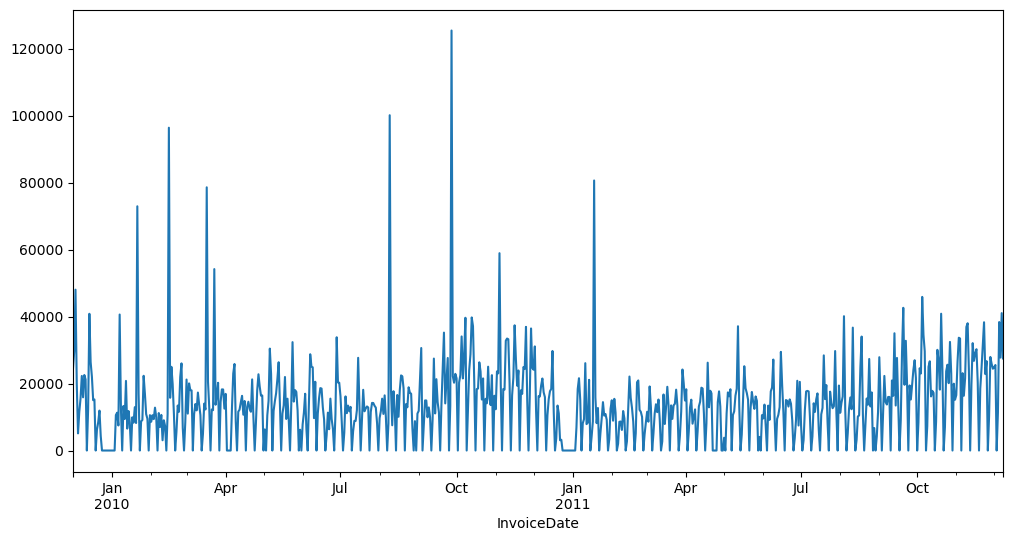

In [71]:
data_cleaned.set_index("InvoiceDate").resample("D").Quantity.sum().plot(figsize = (12,6));

### Daily Sales Quantity Trend for the United Kingdom

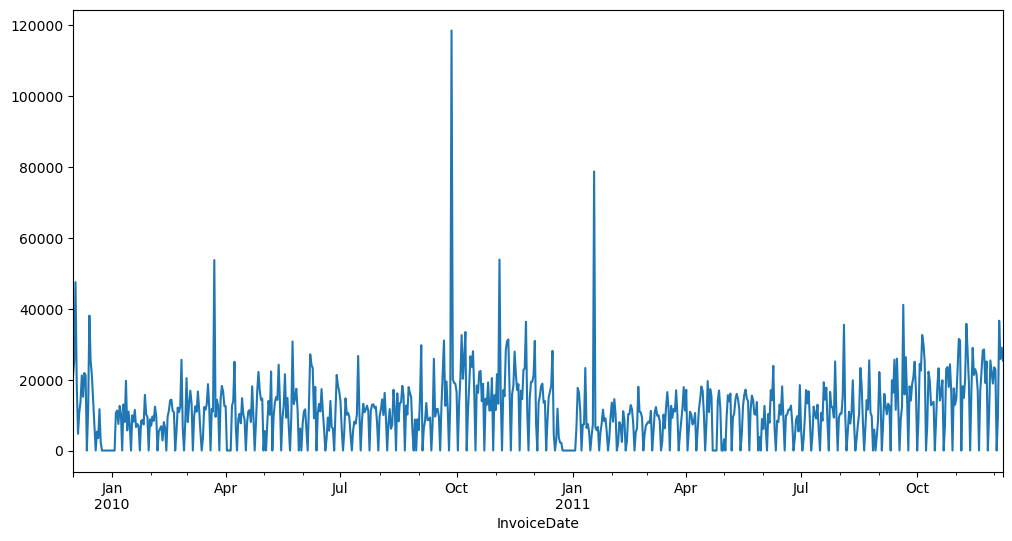

In [79]:
data_cleaned[(data_cleaned.Country == "United Kingdom")].set_index("InvoiceDate").resample("D").Quantity.sum().plot(figsize = (12,6));

### Weekly Quantity Trends for the United Kingdom

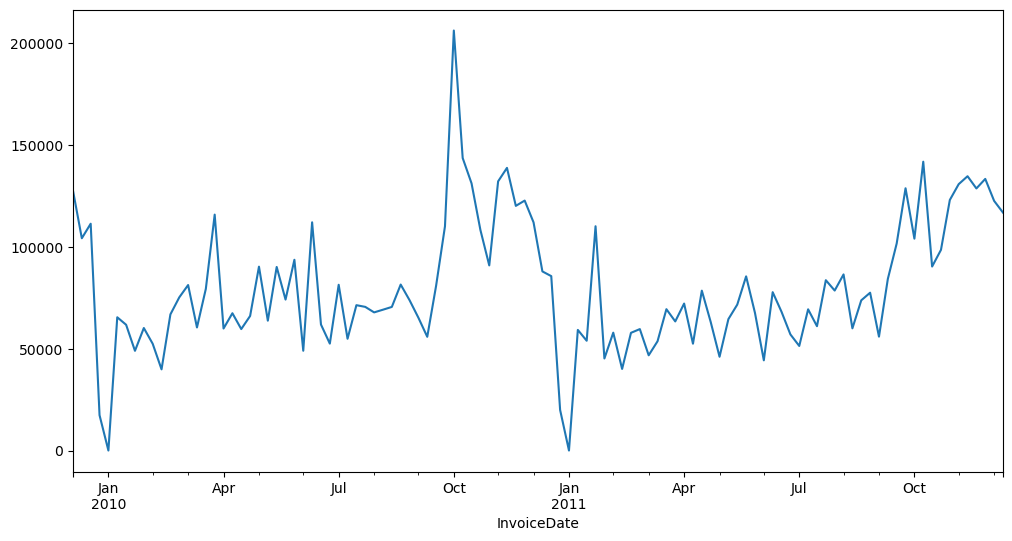

In [83]:
data_cleaned[(data_cleaned.Country == "United Kingdom")].set_index("InvoiceDate").resample("W").Quantity.sum().plot(figsize = (12,6));

### Divide the 'InvoiceDate' column into 'InvoiceYear' and 'InvoiceMonth'

In [92]:
data_cleaned.loc[:, "InvoiceYear"] = data_cleaned["InvoiceDate"].dt.year
data_cleaned.loc[:, "InvoiceMonth"] = data_cleaned["InvoiceDate"].dt.month
data_cleaned.loc[:, "InvoiceDay"] = data_cleaned["InvoiceDate"].dt.day
data_cleaned.loc[:, "InvoiceWeek"] = data_cleaned["InvoiceDate"].dt.isocalendar().week
data_cleaned.loc[:, "InvoiceWeekday"] = data_cleaned["InvoiceDate"].dt.weekday
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0,2010,12,1,48,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0,2010,12,1,48,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0,2010,11,30,48,1
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0,2010,11,30,48,1
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1


### Sales over Weeks

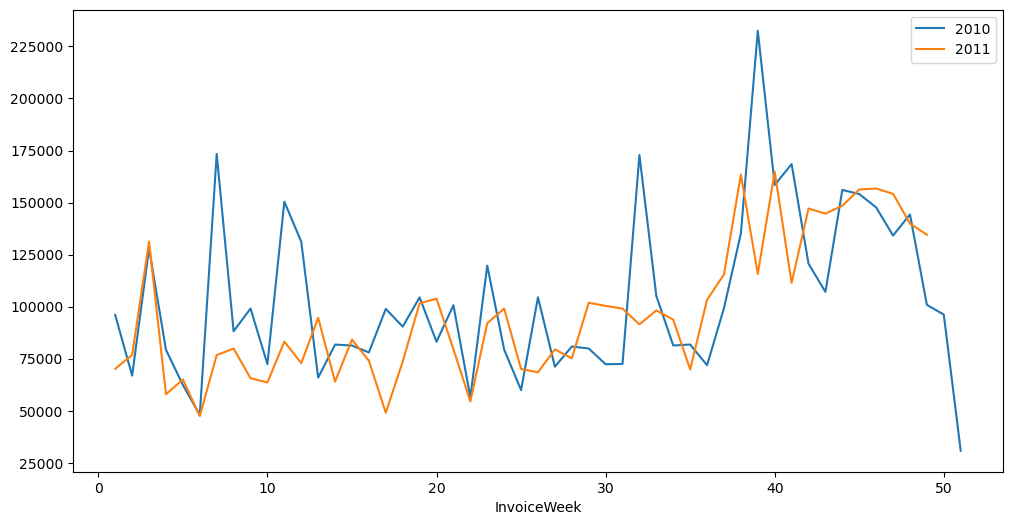

In [107]:
data_cleaned.loc[(data_cleaned.InvoiceYear == 2010)].groupby("InvoiceWeek").Quantity.sum().plot(figsize = (12,6),label = "2010")
data_cleaned.loc[(data_cleaned.InvoiceYear == 2011)].groupby("InvoiceWeek").Quantity.sum().plot(figsize = (12,6), label = "2011")
plt.legend()
plt.show()

### Revenue

In [110]:
data_cleaned = data_cleaned.copy()
data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['Price']
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0,2010,12,1,48,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0,2010,12,1,48,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1,25.20
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0,2010,11,30,48,1,15.90
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0,2010,11,30,48,1,15.00
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1,50.40


### Count of Customer ID's and group by Country and InvoiceYear

In [112]:
customerid_country = data_cleaned.groupby(['Country', 'InvoiceYear'])['Customer ID'].count().sort_values(ascending=False).reset_index()
customerid_country

,Country,InvoiceYear,Customer ID
0,United Kingdom,2010,346531
1,United Kingdom,2011,325338
2,United Kingdom,2009,28135
3,Germany,2011,8433
4,EIRE,2010,8172
...,...,...,...
90,Saudi Arabia,2011,9
91,Denmark,2009,8
92,Finland,2009,4
93,Sweden,2009,2


[]

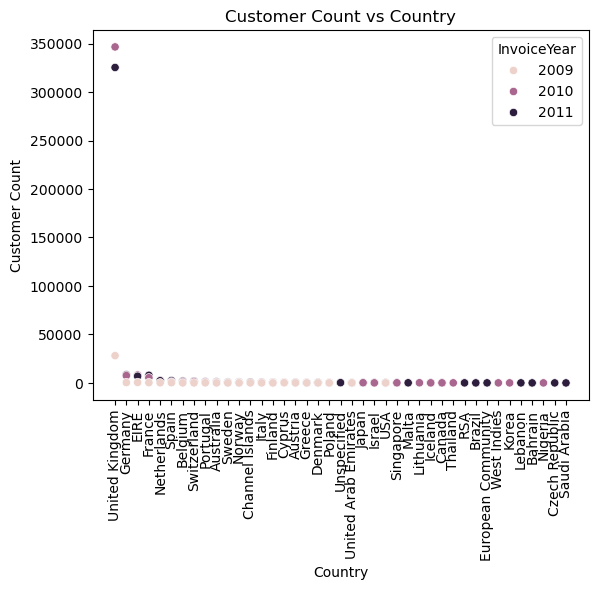

In [114]:
customerid_vs_country = sns.scatterplot(x = 'Country', y = 'Customer ID', hue = 'InvoiceYear', data = customerid_country)
customerid_vs_country.set_xlabel('Country')
customerid_vs_country.set_ylabel('Customer Count')
customerid_vs_country.set_title('Customer Count vs Country')
plt.xticks(rotation=90)
plt.plot()

### Total Revenue of each country (high to low)

In [116]:
country_revenue = data_cleaned.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()
country_revenue

,Country,Revenue
0,United Kingdom,1.420969e+07
1,EIRE,6.165705e+05
2,Netherlands,5.540381e+05
3,Germany,4.233300e+05
4,France,3.485015e+05
5,Australia,1.692835e+05
6,Spain,1.083325e+05
7,Switzerland,1.000619e+05
8,Sweden,9.151582e+04
9,Denmark,6.858069e+04


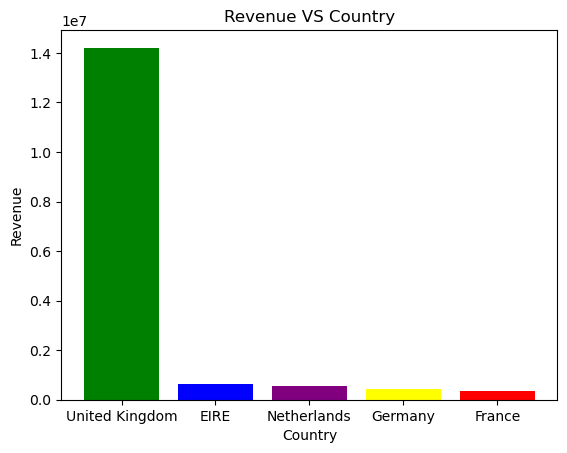

In [118]:
country_revenue = country_revenue.head()
colors = ['Green', 'Blue', 'Purple', 'Yellow', 'Red']
plt.bar(country_revenue['Country'], country_revenue['Revenue'], color = colors)
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Revenue VS Country')
plt.show()

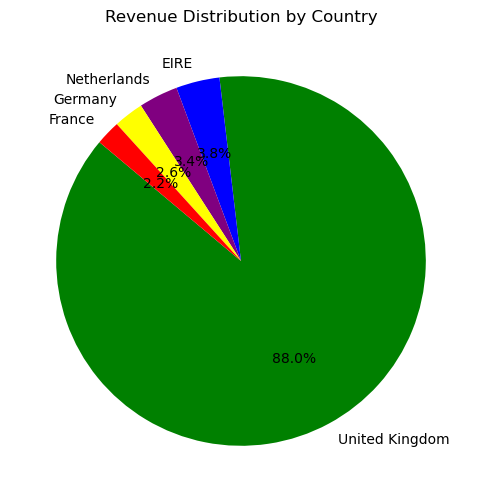

In [120]:
country_revenue = country_revenue.head()
colors = ['Green', 'Blue', 'Purple', 'Yellow', 'Red']
plt.figure(figsize=(8, 6))
plt.pie(country_revenue['Revenue'], labels=country_revenue['Country'], colors=colors, autopct='%1.1f%%',startangle=140)
plt.title('Revenue Distribution by Country')
plt.show()

### Total quantity of each country

In [122]:
country_quantity = data_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index()
country_quantity

,Country,Quantity
0,United Kingdom,8458784
1,Netherlands,384519
2,EIRE,318271
3,France,270183
4,Denmark,237471
5,Germany,224293
6,Australia,104067
7,Sweden,88495
8,Switzerland,52228
9,Spain,50318


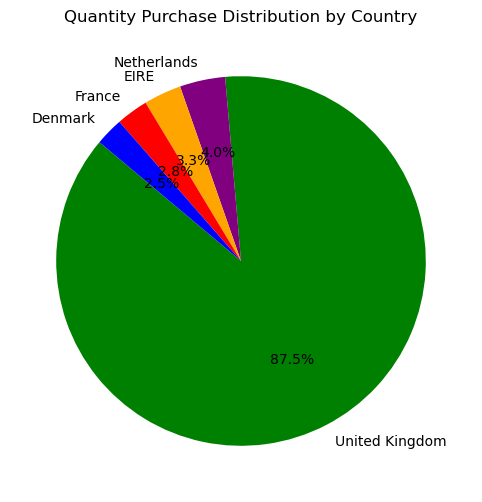

In [124]:
country_quantity = country_quantity.head()
colors = ['Green','Purple',  'Orange', 'Red', 'Blue']
plt.figure(figsize=(8, 6))
plt.pie(country_quantity['Quantity'], labels=country_quantity['Country'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Quantity Purchase Distribution by Country')
plt.show()

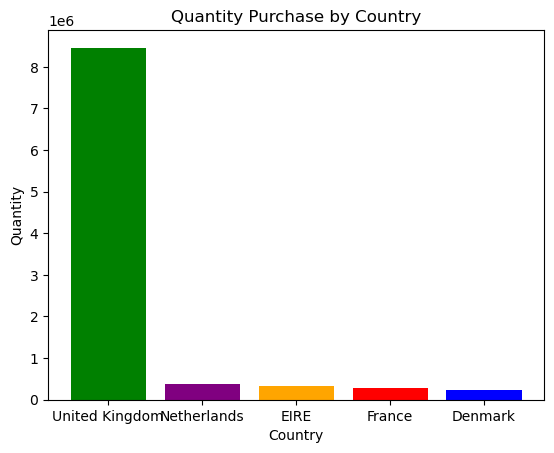

In [126]:
country_quantity = country_quantity.head()
colors = ['Green', 'Purple', 'Orange', 'Red', 'Blue']
plt.bar(country_quantity['Country'], country_quantity['Quantity'], color = colors)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Quantity Purchase by Country')
plt.show()

### Count of quantity and group by Customer ID and Country

In [128]:
customerid_quantity = data_cleaned.groupby(['Customer ID', 'Country'])['Quantity'].sum().sort_values(ascending=False).reset_index().head(100)
customerid_quantity

,Customer ID,Country,Quantity
0,14646.0,Netherlands,367833
1,13902.0,Denmark,220600
2,13694.0,United Kingdom,188201
3,18102.0,United Kingdom,181501
4,14156.0,EIRE,164325
...,...,...,...
95,14667.0,United Kingdom,11939
96,16746.0,United Kingdom,11900
97,14849.0,United Kingdom,11838
98,12731.0,France,11641


[]

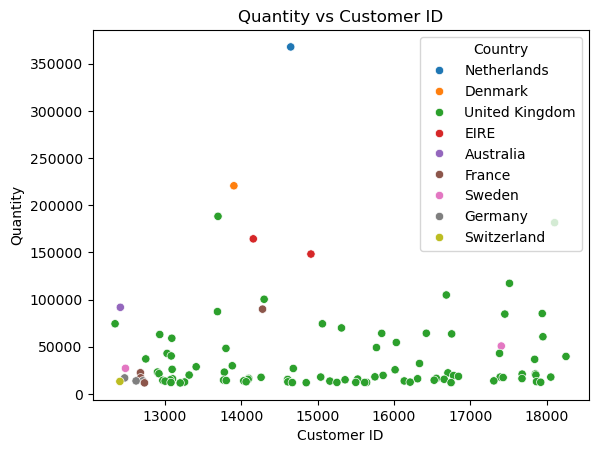

In [130]:
customerid_vs_quantity = sns.scatterplot(x = 'Customer ID', y = 'Quantity', hue = 'Country', data = customerid_quantity)
customerid_vs_quantity.set_xlabel('Customer ID')
customerid_vs_quantity.set_ylabel('Quantity')
customerid_vs_quantity.set_title('Quantity vs Customer ID')
plt.plot()

### Total revenue of each Customer

In [132]:
customerid_revenue = data_cleaned.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)
customerid_revenue

Customer ID
18102.0    580517.60
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
13694.0    195640.69
17511.0    172132.87
16684.0    147142.77
12415.0    144458.37
15061.0    126389.02
Name: Revenue, dtype: float64

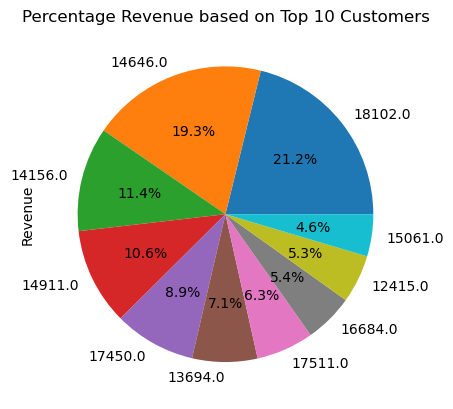

In [134]:
customerid_revenue.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Percentage Revenue based on Top 10 Customers')
plt.show()

### Count Invoice No's for each Customer ID

In [136]:
invoiceno_customerid = data_cleaned.groupby('Customer ID')['Invoice'].count().sort_values(ascending=False).head(10)
invoiceno_customerid

Customer ID
17841.0    12435
14911.0    11079
12748.0     6563
14606.0     6359
14096.0     5111
15311.0     4286
14156.0     4038
14646.0     3854
13089.0     3316
16549.0     3093
Name: Invoice, dtype: int64

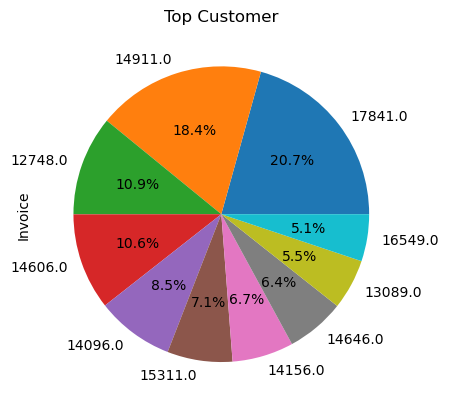

In [138]:
invoiceno_customerid.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Top Customer')
plt.show()

### Top 5 Customers Purchasing Behavior over Time

In [140]:
top_customers = data_cleaned['Customer ID'].value_counts().head(5)
top_customers

Customer ID
17841.0    12435
14911.0    11079
12748.0     6563
14606.0     6359
14096.0     5111
Name: count, dtype: int64

In [142]:
filtered_df = data_cleaned[data_cleaned['Customer ID'].isin(top_customers.index)]
filtered_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday,Revenue
992,536521,22854,CREAM SWEETHEART EGG HOLDER,1,2010-12-01 12:48:00,4.95,12748.0,United Kingdom,12748.0,2010,12,1,48,2,4.95
1367,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE,14911.0,2010,12,1,48,2,39.80
1368,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE,14911.0,2010,12,1,48,2,17.70
1369,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE,14911.0,2010,12,1,48,2,15.30
1370,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE,14911.0,2010,12,1,48,2,42.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794585,536000,85040B,SET/4 BLUE FLOWER CANDLES IN BOWL,1,2010-11-29 14:13:00,1.65,14606.0,United Kingdom,14606.0,2010,11,29,48,0,1.65
794586,536000,22178,VICTORIAN GLASS HANGING T-LIGHT,5,2010-11-29 14:13:00,1.25,14606.0,United Kingdom,14606.0,2010,11,29,48,0,6.25
794587,536000,90214A,"LETTER ""A"" BLING KEY RING",1,2010-11-29 14:13:00,1.25,14606.0,United Kingdom,14606.0,2010,11,29,48,0,1.25
794588,536000,90214C,"LETTER ""C"" BLING KEY RING",1,2010-11-29 14:13:00,1.25,14606.0,United Kingdom,14606.0,2010,11,29,48,0,1.25


In [144]:
filtered_df = data_cleaned[data_cleaned['Customer ID'].isin(top_customers.index)]

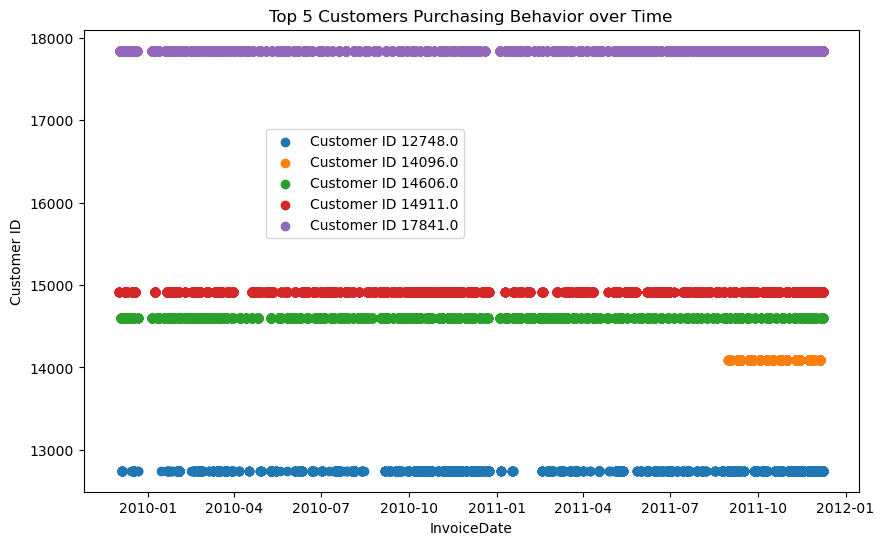

In [146]:
plt.figure(figsize=(10, 6))
for customer_id, group in filtered_df.groupby('Customer ID'):
    plt.scatter(group['InvoiceDate'], [customer_id] * len(group), label=f'Customer ID {customer_id}')

plt.xlabel('InvoiceDate')
plt.ylabel('Customer ID')
plt.title('Top 5 Customers Purchasing Behavior over Time')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.8))
plt.show()

### Group the data according to InvoiceYear and InvoiceMonth and get the total Revenue

In [148]:
invoicemonth_revenue = data_cleaned.groupby(['InvoiceYear', 'InvoiceMonth'])['Revenue'].sum().reset_index()
invoicemonth_revenue

,InvoiceYear,InvoiceMonth,Revenue
0,2009,12,683504.010
1,2010,1,555802.672
2,2010,2,504558.956
3,2010,3,696978.471
4,2010,4,591982.002
5,2010,5,597833.380
6,2010,6,636371.130
7,2010,7,589736.170
8,2010,8,602224.600
9,2010,9,829013.951


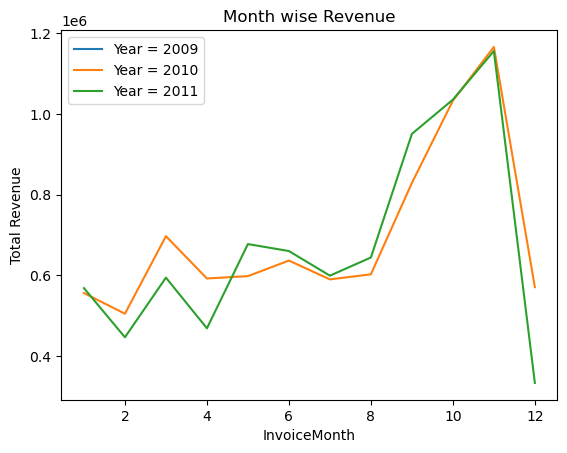

In [150]:
invoiceyears = invoicemonth_revenue['InvoiceYear'].unique()

for year in invoiceyears:
    data = invoicemonth_revenue[invoicemonth_revenue['InvoiceYear'] == year]
    colors = ['Green', 'Red']
    plt.plot(data['InvoiceMonth'], data['Revenue'], label = f'Year = {year}')

plt.xlabel('InvoiceMonth')
plt.ylabel('Total Revenue')
plt.title('Month wise Revenue')
plt.legend()
plt.show()

### Group the data according to InvoiceYear and Month and get the total quantity for each month

In [152]:
date_vs_quantity = data_cleaned.groupby(['InvoiceYear', 'InvoiceMonth'])['Quantity'].sum().reset_index()
date_vs_quantity

,InvoiceYear,InvoiceMonth,Quantity
0,2009,12,398708
1,2010,1,370128
2,2010,2,371871
3,2010,3,502101
4,2010,4,350604
5,2010,5,384960
6,2010,6,389880
7,2010,7,324638
8,2010,8,452551
9,2010,9,567806


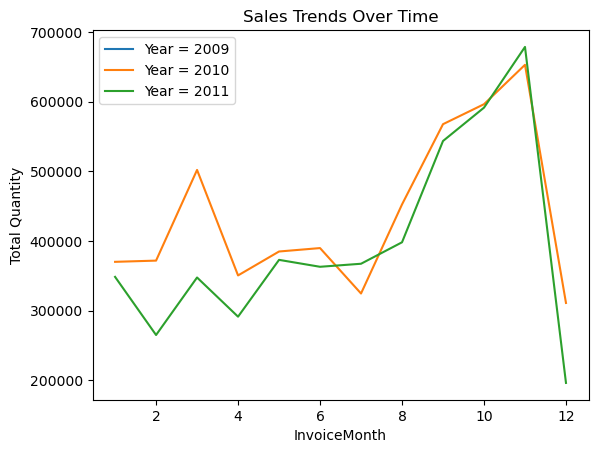

In [154]:
invoiceyears = date_vs_quantity['InvoiceYear'].unique()

for year in invoiceyears:
    data = date_vs_quantity[date_vs_quantity['InvoiceYear'] == year]
    colors = ['Blue', 'Red']
    plt.plot(data['InvoiceMonth'], data['Quantity'], label = f'Year = {year}')
    
plt.xlabel('InvoiceMonth')
plt.ylabel('Total Quantity')
plt.title('Sales Trends Over Time')
plt.legend()
plt.show()

In [156]:
customerid_vs_invoicedate = data_cleaned.groupby(['InvoiceYear', 'InvoiceMonth'])['Customer ID'].count().reset_index()
customerid_vs_invoicedate

,InvoiceYear,InvoiceMonth,Customer ID
0,2009,12,30279
1,2010,1,21461
2,2010,2,23042
3,2010,3,31783
4,2010,4,26834
5,2010,5,28233
6,2010,6,30691
7,2010,7,26644
8,2010,8,26030
9,2010,9,34131


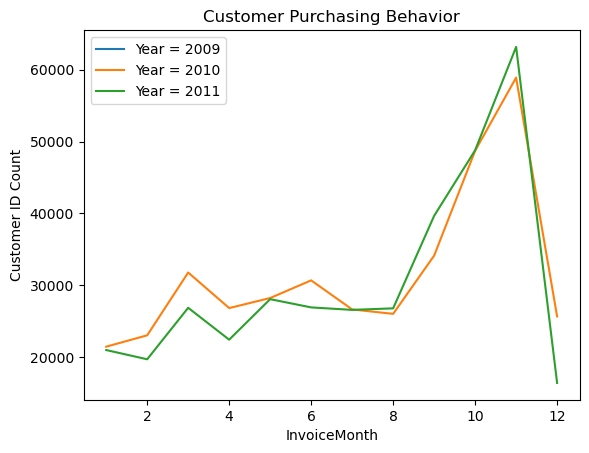

In [158]:
invoiceyears = date_vs_quantity['InvoiceYear'].unique()

for year in invoiceyears:
    data = customerid_vs_invoicedate[customerid_vs_invoicedate['InvoiceYear'] == year]
    plt.plot(data['InvoiceMonth'], data['Customer ID'], label = f'Year = {year}')
    
plt.xlabel('InvoiceMonth')
plt.ylabel('Customer ID Count')
plt.title('Customer Purchasing Behavior')
plt.legend()
plt.show()

## Quantity for each Top 10 Description

In [160]:
quantity_count = data_cleaned.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index().head(10)
quantity_count

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,5016
1,REGENCY CAKESTAND 3 TIER,3336
2,ASSORTED COLOUR BIRD ORNAMENT,2691
3,JUMBO BAG RED RETROSPOT,2640
4,PARTY BUNTING,2099
5,LUNCH BAG BLACK SKULL.,2044
6,REX CASH+CARRY JUMBO SHOPPER,1950
7,LUNCH BAG SPACEBOY DESIGN,1890
8,STRAWBERRY CERAMIC TRINKET BOX,1859
9,HOME BUILDING BLOCK WORD,1852


In [244]:
quantity_count = data_cleaned.groupby('StockCode')['Quantity'].count().sort_values(ascending=False).reset_index().head(10)
quantity_count

,StockCode,Quantity
0,85123A,5022
1,22423,3336
2,85099B,3295
3,84879,2691
4,20725,2607
5,21212,2557
6,47566,2099
7,20727,2044
8,22383,2039
9,21034,1950


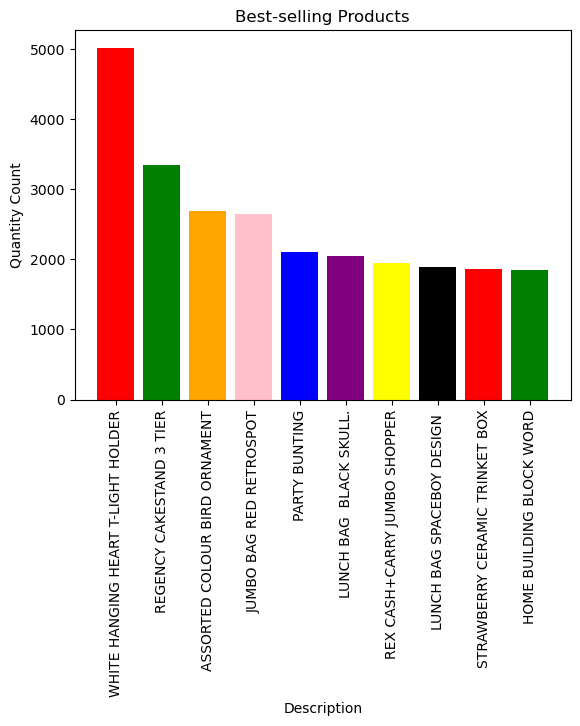

In [162]:
colors = ['Red', 'Green', 'Orange', 'Pink', 'Blue', 'Purple', 'Yellow', 'Black']
plt.bar(quantity_count['Description'], quantity_count['Quantity'], color = colors)
plt.xlabel('Description')
plt.ylabel('Quantity Count')
plt.title('Best-selling Products')
plt.xticks(rotation=90)
plt.show()

## Extracting Month and Year

In [164]:
# Convert InvoiceDate to datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0,2010,12,1,48,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0,2010,12,1,48,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1,25.20
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0,2010,11,30,48,1,15.90
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0,2010,11,30,48,1,15.00
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1,50.40


In [166]:
data_cleaned['YearMonth'] = data_cleaned['InvoiceDate'].dt.to_period('M')
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday,Revenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0,2010,12,1,48,2,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0,2010,12,1,48,2,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1,25.20,2010-11
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0,2010,11,30,48,1,15.90,2010-11
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0,2010,11,30,48,1,15.00,2010-11
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1,50.40,2010-11


## Total revenue

In [168]:
data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['Price']
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday,Revenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0,2010,12,1,48,2,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0,2010,12,1,48,2,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1,25.20,2010-11
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0,2010,11,30,48,1,15.90,2010-11
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0,2010,11,30,48,1,15.00,2010-11
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1,50.40,2010-11


In [170]:
customer_revenue = data_cleaned.groupby('Customer ID')['Revenue'].sum()
customer_revenue

Customer ID
12346.0    77556.46
12347.0     4921.53
12348.0     2019.40
12349.0     4428.69
12350.0      334.40
             ...   
18283.0     2664.90
18284.0      461.68
18285.0      427.00
18286.0     1296.43
18287.0     4182.99
Name: Revenue, Length: 5880, dtype: float64

In [172]:
customer_revenue_sorted = customer_revenue.sort_values(ascending=False)
customer_revenue_sorted

Customer ID
18102.0    580517.60
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
             ...    
14095.0         2.95
16446.0         2.90
14827.0         0.00
13256.0         0.00
14103.0         0.00
Name: Revenue, Length: 5880, dtype: float64

## Top 20 customers

In [174]:
top_20_percent_customers = customer_revenue_sorted.head(20)
top_20_percent_customers

Customer ID
18102.0    580517.60
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
13694.0    195640.69
17511.0    172132.87
16684.0    147142.77
12415.0    144458.37
15061.0    126389.02
16029.0    117763.62
17949.0    117314.08
15311.0    114471.82
13089.0    113416.91
12931.0     92347.34
14298.0     91194.49
15769.0     88612.52
12346.0     77556.46
13798.0     75428.87
15838.0     73205.50
Name: Revenue, dtype: float64

## Monthly Sales

In [176]:
monthly_sales = data_cleaned.groupby('YearMonth')['Quantity'].sum()
monthly_sales

YearMonth
2009-12    398708
2010-01    370128
2010-02    371871
2010-03    502101
2010-04    350604
2010-05    384960
2010-06    389880
2010-07    324638
2010-08    452551
2010-09    567806
2010-10    596497
2010-11    653074
2010-12    311063
2011-01    348522
2011-02    265043
2011-03    347623
2011-04    291369
2011-05    372948
2011-06    363014
2011-07    367372
2011-08    398190
2011-09    543654
2011-10    591551
2011-11    678760
2011-12    196225
Freq: M, Name: Quantity, dtype: int64

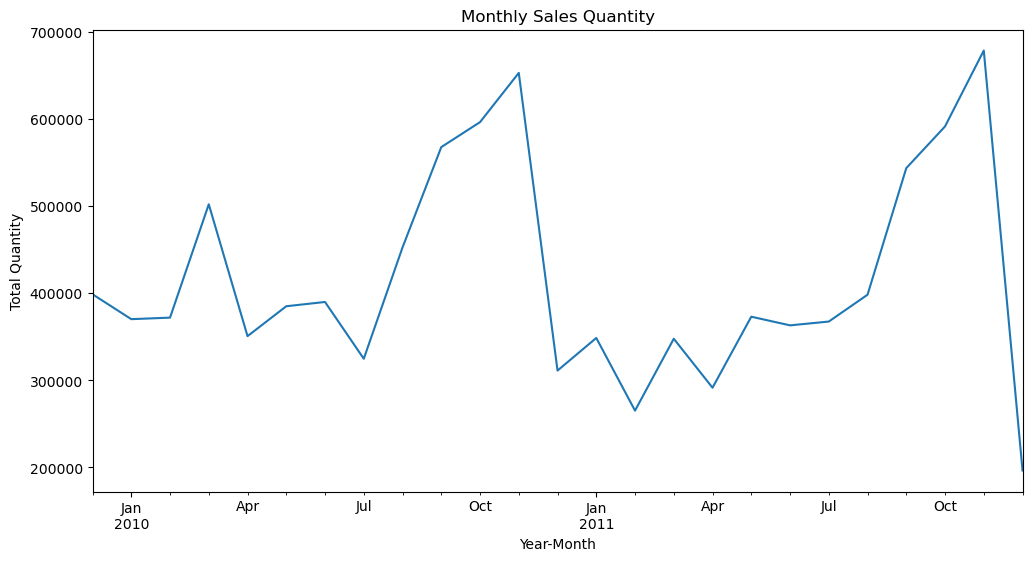

In [178]:
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title("Monthly Sales Quantity")
plt.xlabel("Year-Month")
plt.ylabel("Total Quantity")
plt.show()

In [180]:
data_cleaned = data_cleaned.copy()

# Convert InvoiceDate to datetime format
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned['Date'] = data_cleaned['InvoiceDate'].dt.date
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.to_period('M')
data_cleaned['Hour'] = data_cleaned['InvoiceDate'].dt.hour

data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerID,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday,Revenue,YearMonth,Date,Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0,2010,12,1,48,2,15.30,2010-12,2010-12-01,2010-12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34,2010-12,2010-12-01,2010-12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0,2010,12,1,48,2,22.00,2010-12,2010-12-01,2010-12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34,2010-12,2010-12-01,2010-12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,2010,12,1,48,2,20.34,2010-12,2010-12-01,2010-12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1,25.20,2010-11,2010-11-30,2010-11,19
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,14441.0,2010,11,30,48,1,15.90,2010-11,2010-11-30,2010-11,19
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,14441.0,2010,11,30,48,1,15.00,2010-11,2010-11-30,2010-11,19
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,14441.0,2010,11,30,48,1,50.40,2010-11,2010-11-30,2010-11,19


## Daily sales

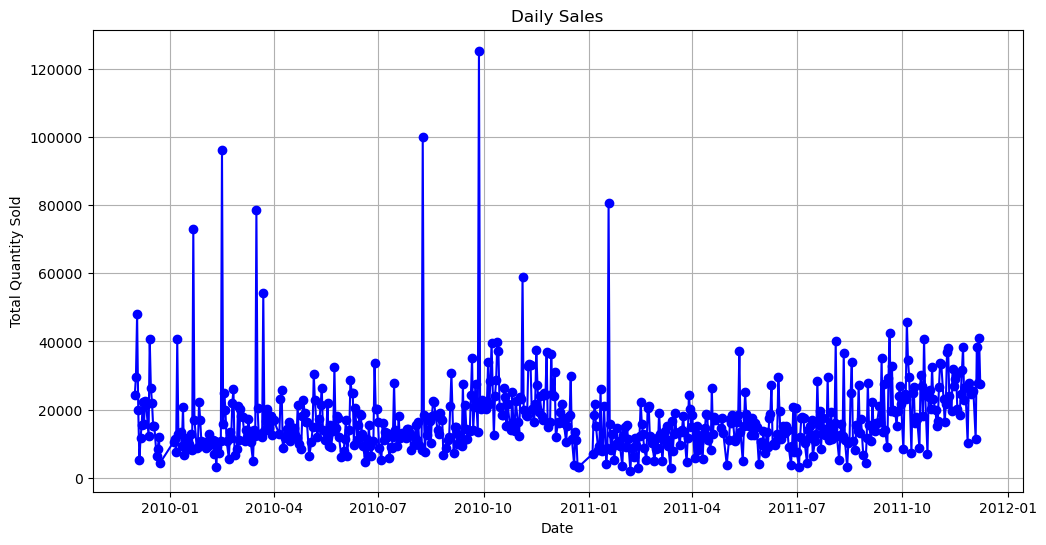

In [182]:
daily_sales = data_cleaned.groupby('Date')['Quantity'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot(color='blue', marker='o')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid()
plt.show()

## Monthly sales

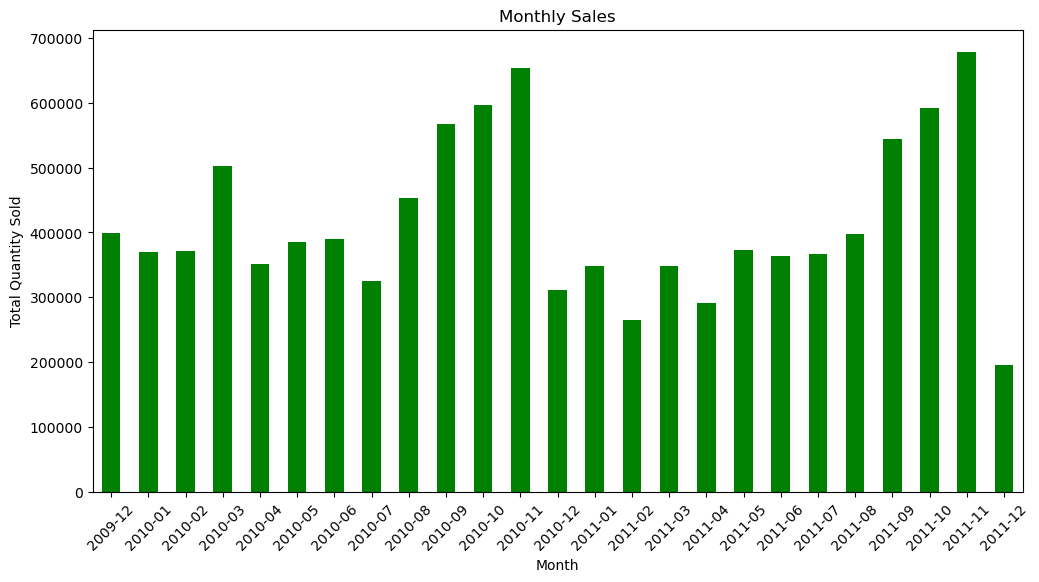

In [184]:
monthly_sales = data_cleaned.groupby('Month')['Quantity'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='green')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

## Calculate hourly sales

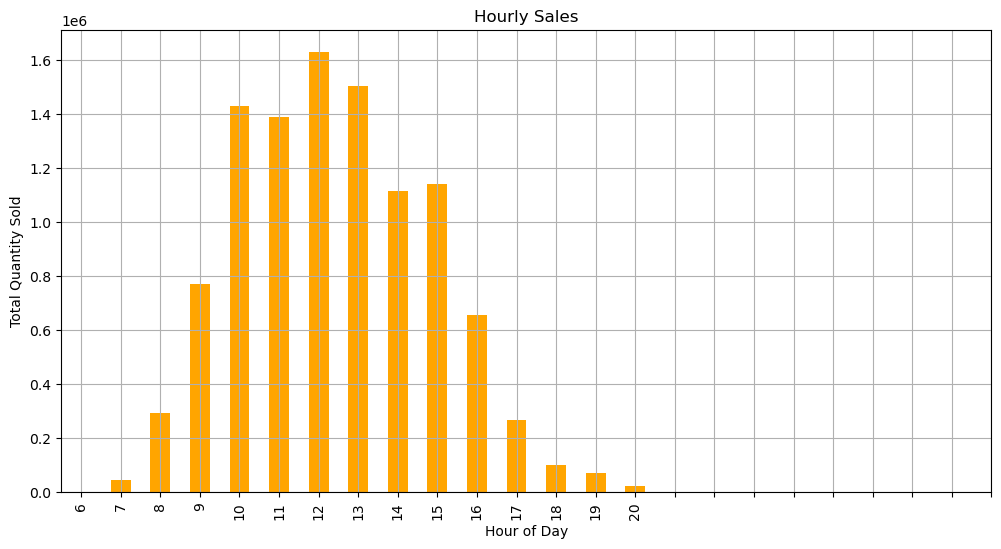

In [186]:
hourly_sales = data_cleaned.groupby('Hour')['Quantity'].sum()
plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='bar', color='orange')
plt.title('Hourly Sales')
plt.xlabel('Hour of Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(0, 24))
plt.grid()
plt.show()